<a href="https://colab.research.google.com/github/Alenushka2013/Customer-Personality-Analysis/blob/main/Clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.


На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.


**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn import metrics

path = 'https://raw.githubusercontent.com/Alenushka2013/Coursera/refs/heads/master/Datasets/marketing_campaign.csv'
df = pd.read_csv(path, sep = '\t')

In [ ]:
def df_main_info(df):

  print('Основна інформація про дані:')

  print('Кількість рядків:', df.shape[0], ' кількість колонок:', df.shape[1], end = '\n\n')

  # Виділення числових та категоріальних колонок
  numeric_cols = df.select_dtypes(include='number').columns
  categor_cols = df.select_dtypes(include='object').columns
  print('Кількість числових колонок:', len(numeric_cols))
  print('Кількість категоріальних колонок:', len(categor_cols), end = '\n\n')

  display(df.head())

  values_list = []
  for col in df.columns:
      if df[col].dtype == 'object' or df[col].dtype.name == 'category':
          # категоріальна: список унікальних значень
          values_list.append(df[col].unique())
      elif np.issubdtype(df[col].dtype, np.number):
          # числова: мін та макс
          values_list.append((df[col].min(), df[col].max()))
      else:
          values_list.append(None)  # інші типи


  df_info = pd.DataFrame({'column_type': df.dtypes, 'number_of_unique_values': df.nunique(),'number_of_missing_values': df.isna().sum()},index=df.columns)
  df_info['values'] = values_list
  df_info.index.name = "column_name"
  display(df_info)

  if df.isnull().sum().sum() > 0:

    print('\n\n Колонки з пропущеними значеннями')

    # додаємо колонку з відсотком пропусків
    df_info["percent_missing"] = round(df_info["number_of_missing_values"] / len(df) * 100, 2)
    display(df_info[df_info.number_of_missing_values > 0])

In [ ]:
df_main_info(df)

Основна інформація про дані:
Кількість рядків: 2240  кількість колонок: 29

Кількість числових колонок: 26
Кількість категоріальних колонок: 3



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


,column_type,number_of_unique_values,number_of_missing_values,values
column_name,,,,
ID,int64,2240,0,"(0, 11191)"
Year_Birth,int64,59,0,"(1893, 1996)"
Education,object,5,0,"[Graduation, PhD, Master, Basic, 2n Cycle]"
Marital_Status,object,8,0,"[Single, Together, Married, Divorced, Widow, A..."
Income,float64,1974,24,"(1730.0, 666666.0)"
Kidhome,int64,3,0,"(0, 2)"
Teenhome,int64,3,0,"(0, 2)"
Dt_Customer,object,663,0,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
Recency,int64,100,0,"(0, 99)"




 Колонки з пропущеними значеннями


,column_type,number_of_unique_values,number_of_missing_values,values,percent_missing
column_name,,,,,
Income,float64,1974,24,"(1730.0, 666666.0)",1.07


In [ ]:
df = df.set_index(keys='ID')
#df.drop(['Z_CostContact', 'Z_Revenue'], axis = 1, inplace = True)

Можливі варіанти заповнення пропущених значень:
1. Мода, медіана, середнє - найпростіше. Добре, коли розподіл однорідний і немає сильних викидів.
2. KNN-imputer - заповнює пропуск середнім/медіаною найближчих сусідів. Добре підходить для задач кластеризації, бо зберігає локальну подібність.
3. Прогноз окремою моделлю (наприклад, регресією чи деревом) для кожної ознаки з пропусками.

In [ ]:
df.Income.describe(percentiles=[0, 0.25, 0.5, 0.75, 0.999, 1])

,Income
count,2216.000000
mean,52247.251354
std,25173.076661
min,1730.000000
0%,1730.000000
25%,35303.000000
50%,51381.500000
75%,68522.000000
99.9%,160142.950000
100%,666666.000000


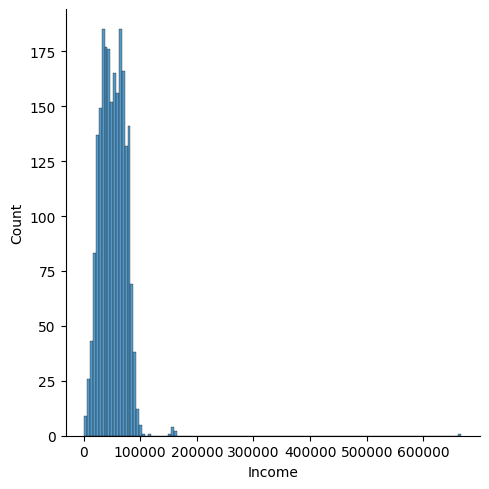

In [ ]:
sns.displot(df['Income']);

In [ ]:
# Заміна пропущених значень медіаною
df['Income_median'] = df.Income.fillna(df.Income.median())

# Заміна пропущених значень середнім значенням
mean_Income = df.Income[df.Income < 200000].mean()
df['Income_mean'] = df.Income.fillna(mean_Income)
df.loc[df['Income_mean'] > 200000, 'Income_mean'] = mean_Income

**Спостереження:**

Значення 666666 в колонці Income є викидом, тому заміна середнім значенням може бути некоректною. Можна замінити і викид, і пропущені значення на середнє.

In [ ]:
# Колонки з нечисловими значеннями
categor_cols = df.select_dtypes(include='object').columns
categor_cols

Index(['Education', 'Marital_Status', 'Dt_Customer'], dtype='object', name='column_name')

In [ ]:
df.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
mapping = {'Basic': 0, '2n Cycle': 1, 'Graduation': 2, 'Master': 3, 'PhD': 4}
df['Education_encoded'] = df['Education'].map(mapping)

In [ ]:
df.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# енкодер
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# кодуємо колонку
encoded = encoder.fit_transform(df[['Marital_Status']])

# робимо DataFrame з новими колонками
encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(['Marital_Status']),
    index=df.index
)

# додаємо до df
df = pd.concat([df, encoded_df], axis=1)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
df.Dt_Customer.unique()

<DatetimeArray>
['2012-09-04 00:00:00', '2014-03-08 00:00:00', '2013-08-21 00:00:00',
 '2014-02-10 00:00:00', '2014-01-19 00:00:00', '2013-09-09 00:00:00',
 '2012-11-13 00:00:00', '2013-05-08 00:00:00', '2013-06-06 00:00:00',
 '2014-03-13 00:00:00',
 ...
 '2014-03-27 00:00:00', '2012-12-15 00:00:00', '2012-09-17 00:00:00',
 '2013-06-02 00:00:00', '2012-12-21 00:00:00', '2013-11-01 00:00:00',
 '2013-08-10 00:00:00', '2012-10-11 00:00:00', '2012-12-20 00:00:00',
 '2014-01-09 00:00:00']
Length: 663, dtype: datetime64[ns]

In [ ]:
df['Dt_Customer'].min(), df['Dt_Customer'].max()

(Timestamp('2012-07-30 00:00:00'), Timestamp('2014-06-29 00:00:00'))

In [ ]:
df['Customer_days'] = (df['Dt_Customer'] - df['Dt_Customer'].min()).dt.days

**Спостереження:**

**Education**

Можна  застосовувати порядкове кодування (Ordinal Encoding), бо є певний логічний порядок:

Basic < 2n Cycle < Graduation < Master < PhD

**Marital_Status:**

['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

Порядку немає, категорії номінальні. Краще використовувати One-Hot Encoding.


**Dt_Customer:**

'2012-07-30' - ... - '2014-06-29'

Кластеризація працює тільки з числовими даними, тому дату треба перетворити:
можна обчислити кількість днів від дати реєстрації клієнта у компанії.






In [ ]:
#exclude = ['Dt_Customer','Education', 'Marital_Status', 'Income','Income_mean', 'Income_filled_model', 'Income_KNNImputer', 'Z_CostContact', 'Z_Revenue']
df_features_median = df.columns.difference(['Dt_Customer','Education', 'Marital_Status', 'Income','Income_mean', 'Z_CostContact', 'Z_Revenue'])
df_features_mean = df.columns.difference(['Dt_Customer','Education', 'Marital_Status', 'Income','Income_median', 'Z_CostContact', 'Z_Revenue'])

In [ ]:
X = df[df_features_median]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 1 0 ... 0 0 0]


In [ ]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')

Silhouette score(k = 3): 0.60


In [ ]:
X = df[df_features_mean]

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[0 0 2 ... 0 2 0]


In [ ]:
centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')

Silhouette score(k = 3): 0.54


**Спостереження:**

Дані df_features_mean не місять значення викиду(666 666) для колонки Income,  на відміну від df_features_median.

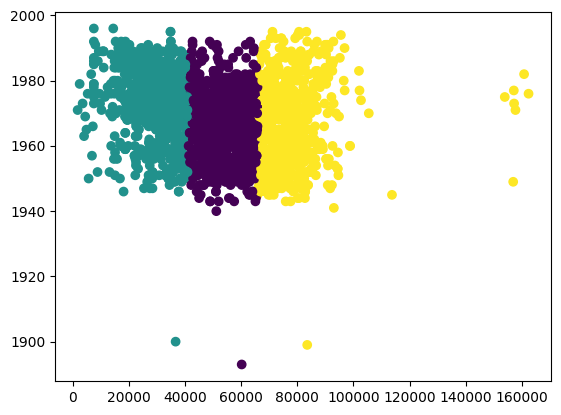

In [ ]:
# predicted data
plt.scatter(X['Income_mean'], X['Year_Birth'], c=labels)
plt.show()

In [ ]:
fig = px.scatter_3d(X,
                    x='Income_mean',
                    y='MntMeatProducts',
                    z='NumDealsPurchases',
                    color=labels,
                    title="3D графік розсіювання кластерів")

# Показати графік
fig.show()

**Спостереження:**

Візуалізація розподілу на кластери відностно річного доходу та дати народження показує наявність викидів для обох цих категорій. Також річний дохід поки що найбільш важлива ознака для якої розподіл помітний та має сенс.

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[df_features_median]

# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризація
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Отримуємо мітки кластерів
labels = kmeans.predict(X_scaled)
print(labels)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')


[1 0 1 ... 1 1 0]
Silhouette score(k = 3): 0.20


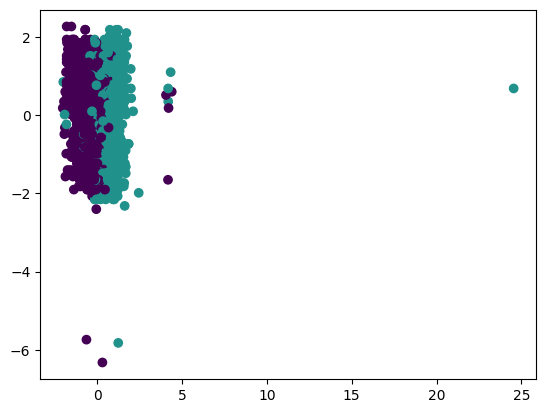

In [ ]:
# predicted data
plt.scatter(X_scaled[:, X.columns.get_loc('Income_median')],
            X_scaled[:, X.columns.get_loc('Year_Birth')],
            c=labels)
plt.show()

In [ ]:
X = df[df_features_mean]

# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Кластеризація
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Отримуємо мітки кластерів
labels = kmeans.predict(X_scaled)
print(labels)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')

[2 0 1 ... 1 1 0]
Silhouette score(k = 3): 0.13


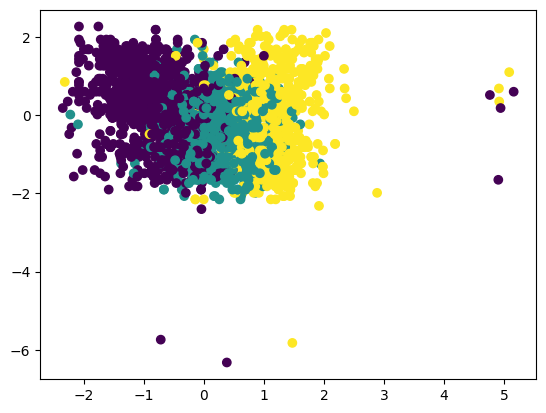

In [ ]:
plt.scatter(X_scaled[:, X.columns.get_loc('Income_mean')],
            X_scaled[:, X.columns.get_loc('Year_Birth')],
            c=labels)
plt.show()

**Спостереження:**

Масштабування значно погіршило результат, значення метрики вказує на те, що відсутня значима структура кластерів. Варто розглянути інші алгоритми або параметри.

In [ ]:
X = df[df_features_median]  # пропущені значення в даних заповнені медіаною

In [ ]:
X_new = X.copy()

Q1 = X_new.quantile(0.15)
Q3 = X_new.quantile(0.85)
IQR = Q3 - Q1

for col in X_new.columns:
    lower = Q1[col] - 1.5 * IQR[col]
    upper = Q3[col] + 1.5 * IQR[col]

    # обчислюємо середнє
    mean_val = X_new[col].mean()

    # якщо колонка містить цілі значеняя,  округлюємо до одиниць
    if pd.api.types.is_integer_dtype(X_new[col]):
        mean_val = int(round(mean_val))

    mask = (X_new[col] < lower) | (X_new[col] > upper)
    X_new.loc[mask, col] = mean_val

In [ ]:
# Масштабуємо дані
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_new)

# Кластеризація
kmeans = KMeans(n_clusters=3, n_init='auto', random_state=42)
kmeans.fit(X_scaled)

# Отримуємо мітки кластерів
labels = kmeans.predict(X_scaled)
print(labels)

centroids = kmeans.cluster_centers_
s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')

[1 0 1 ... 1 2 0]
Silhouette score(k = 3): 0.16


In [ ]:
# Перевірка кількості точок у кожному кластері
unique, counts = np.unique(labels, return_counts=True)
cluster_counts = {int(k): int(v) for k, v in zip(unique, counts)}
print(f"Кількість точок у кожному кластері: {cluster_counts}")

Кількість точок у кожному кластері: {0: 1028, 1: 598, 2: 614}


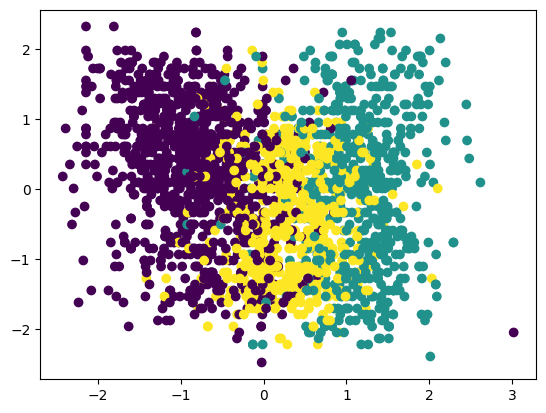

In [ ]:
# predicted data
plt.scatter(X_scaled[:, X_new.columns.get_loc('Income_median')],
            X_scaled[:, X_new.columns.get_loc('Year_Birth')],
            c=labels)
plt.show()

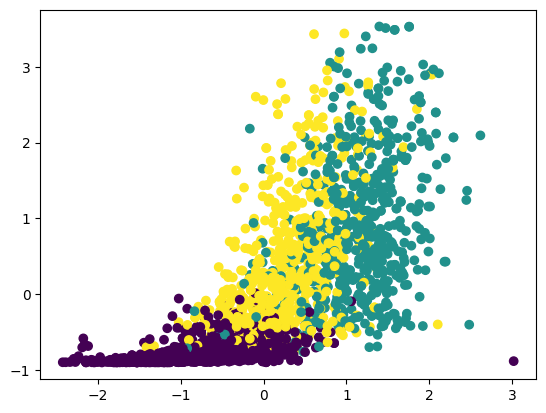

In [ ]:
# predicted data
plt.scatter(X_scaled[:, X_new.columns.get_loc('Income_median')],
            X_scaled[:, X_new.columns.get_loc('MntWines')],
            c=labels)
plt.show()

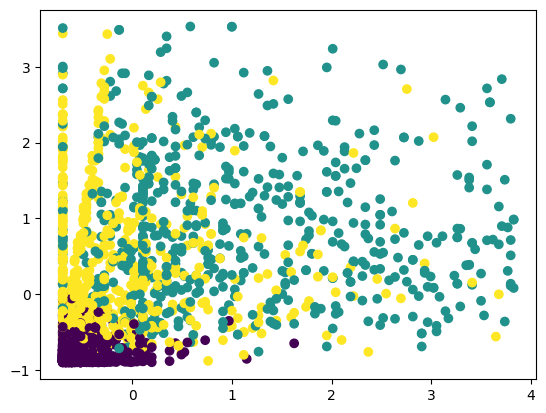

In [ ]:
# predicted data
plt.scatter(X_scaled[:, X_new.columns.get_loc('MntSweetProducts')],
            X_scaled[:, X_new.columns.get_loc('MntWines')],
            c=labels)
plt.show()

In [ ]:
fig = px.scatter_3d(X_new,
                    x='Income_median',
                    y='MntMeatProducts',
                    z='NumDealsPurchases',
                    color=labels,
                    title="3D графік розсіювання кластерів")

# Показати графік
fig.show()

**Спостереження:**

Для масштабованих даних значення метрики все ще незадовільне, відповідно і розгледіти кластери на візуалізаціях теж проблематично.

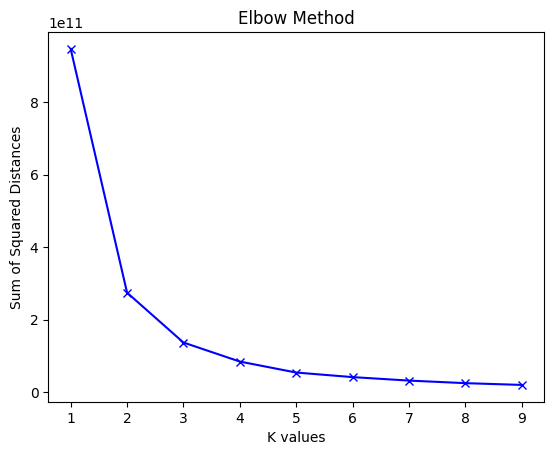

In [ ]:
# Немасштабований набір даних
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_new)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
for clusters in range(2, 5):
  kmeans = KMeans(n_clusters=clusters, n_init='auto')
  kmeans.fit(X_new)

  labels = kmeans.predict(X_new)
  #print(labels)

  centroids = kmeans.cluster_centers_
  s = metrics.silhouette_score(X, labels, metric='euclidean')
  print(f'Silhouette score(k = {clusters}): {s:.2f}')

Silhouette score(k = 2): 0.59
Silhouette score(k = 3): 0.54
Silhouette score(k = 4): 0.50


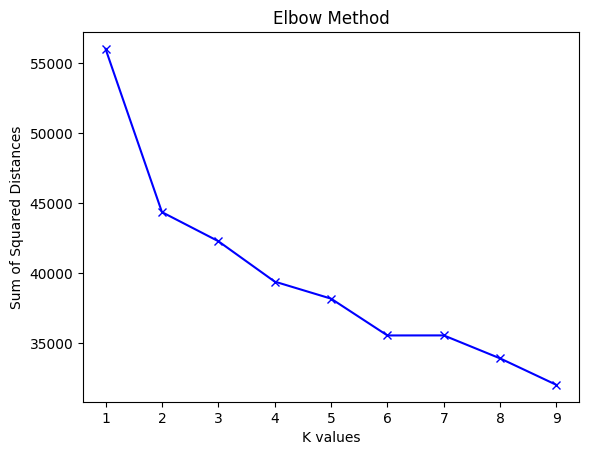

In [ ]:
# масштабований набір даних
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(X_scaled)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [ ]:
for clusters in range(2, 8):
  # Масштабуємо дані
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_new)

  kmeans = KMeans(n_clusters=clusters, n_init='auto')
  kmeans.fit(X_scaled)

  labels = kmeans.predict(X_scaled)

  centroids = kmeans.cluster_centers_
  s = metrics.silhouette_score(X_scaled, labels, metric='euclidean')
  print(f'Silhouette score(k = {clusters}): {s:.2f}')

Silhouette score(k = 2): 0.22
Silhouette score(k = 3): 0.16
Silhouette score(k = 4): 0.15
Silhouette score(k = 5): 0.07
Silhouette score(k = 6): 0.11
Silhouette score(k = 7): 0.10


**Спостереження:**

Для немасштабованих даних найкращення значення метрики силуету для двох кластерів. Для масштабованих даних значення метрики силуету дуже низьке.

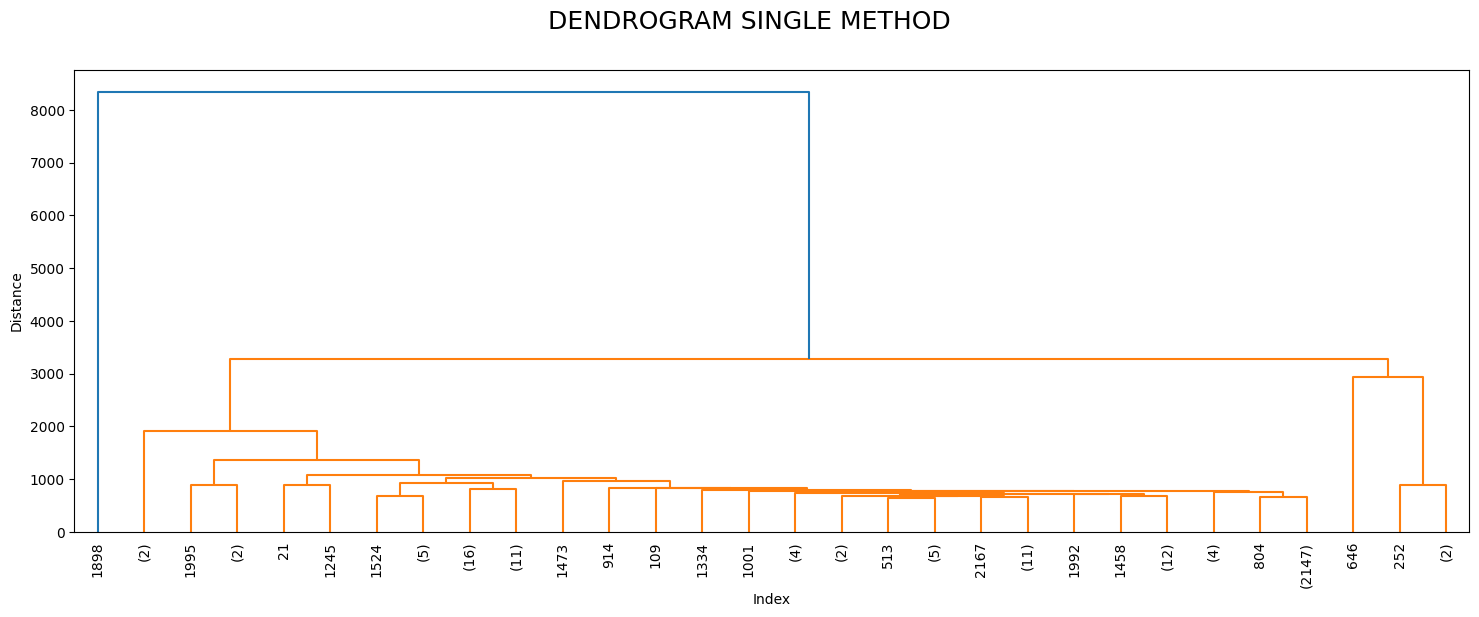

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

dist_sin = linkage(X_new, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90,truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [ ]:
X_new.loc[:, '2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_new.loc[:, '3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

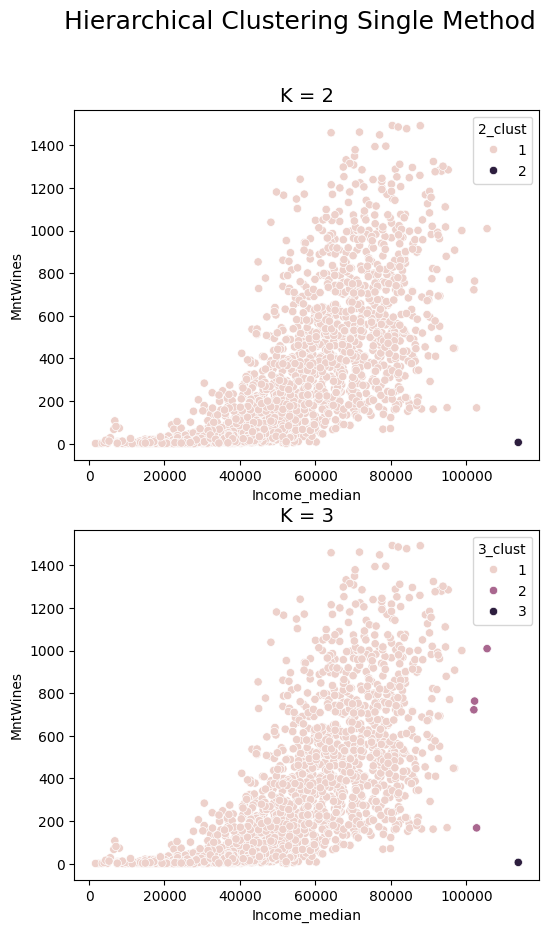

In [ ]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(2,1, 1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income_median",y="MntWines", data=X_new, hue="2_clust")

plt.subplot(2, 1, 2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income_median",y="MntWines", data=X_new, hue="3_clust");

In [ ]:
s = metrics.silhouette_score(X_new, X_new['2_clust'], metric='euclidean')
print(f'Silhouette score(k = 2): {s:.2f}')

Silhouette score(k = 2): 0.56


In [ ]:
s = metrics.silhouette_score(X_new, X_new['3_clust'], metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')

Silhouette score(k = 3): 0.45


In [ ]:
X_new.drop(['2_clust',	'3_clust'], axis = 1, inplace = True)

**Спостереження:**

Метрика силуету для двох кластерів близька за значенням до метрики, отриманої з попереніх експериментів, але візуалізації показують, що розбиття на кластери відбувається набагато гірше.

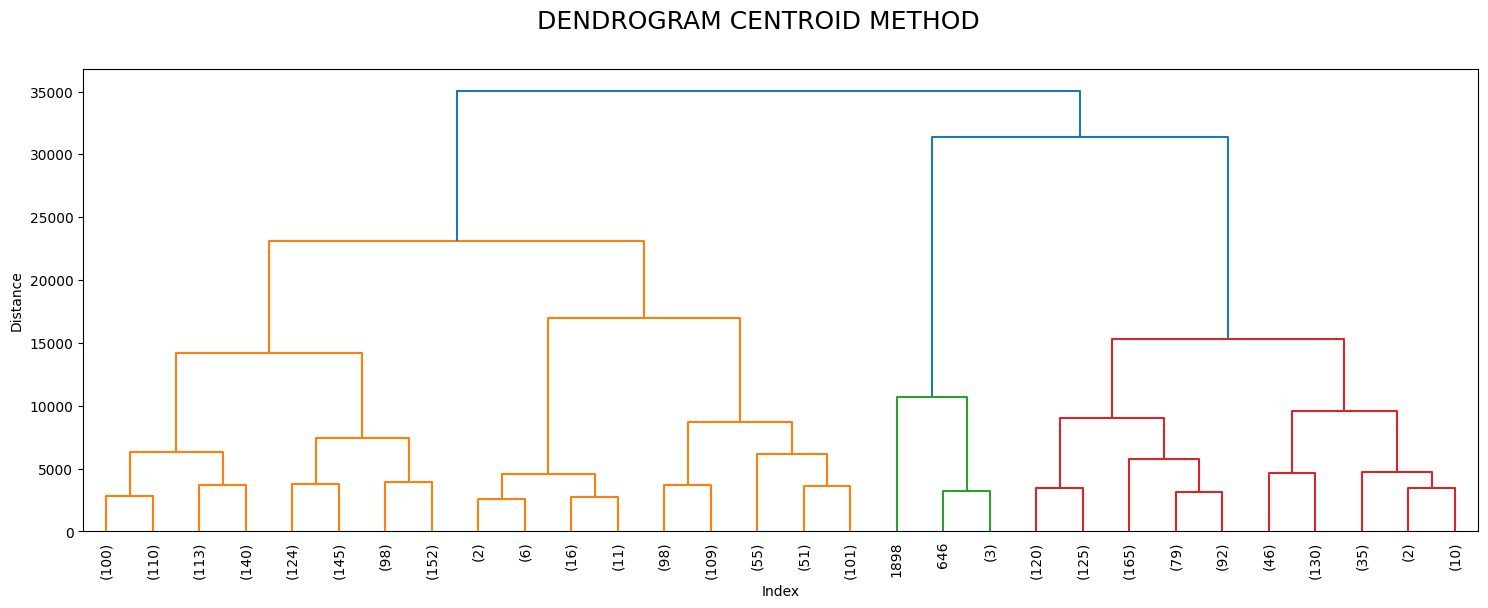

In [ ]:
dist_sin = linkage(X_new, method="centroid")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90,truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM CENTROID METHOD",fontsize=18)
plt.show()

In [ ]:
X_new.loc[:, '2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_new.loc[:, '3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')
X_new.loc[:, '4_clust'] = fcluster(dist_sin, 4, criterion='maxclust')
X_new.loc[:, '5_clust'] = fcluster(dist_sin, 5, criterion='maxclust')

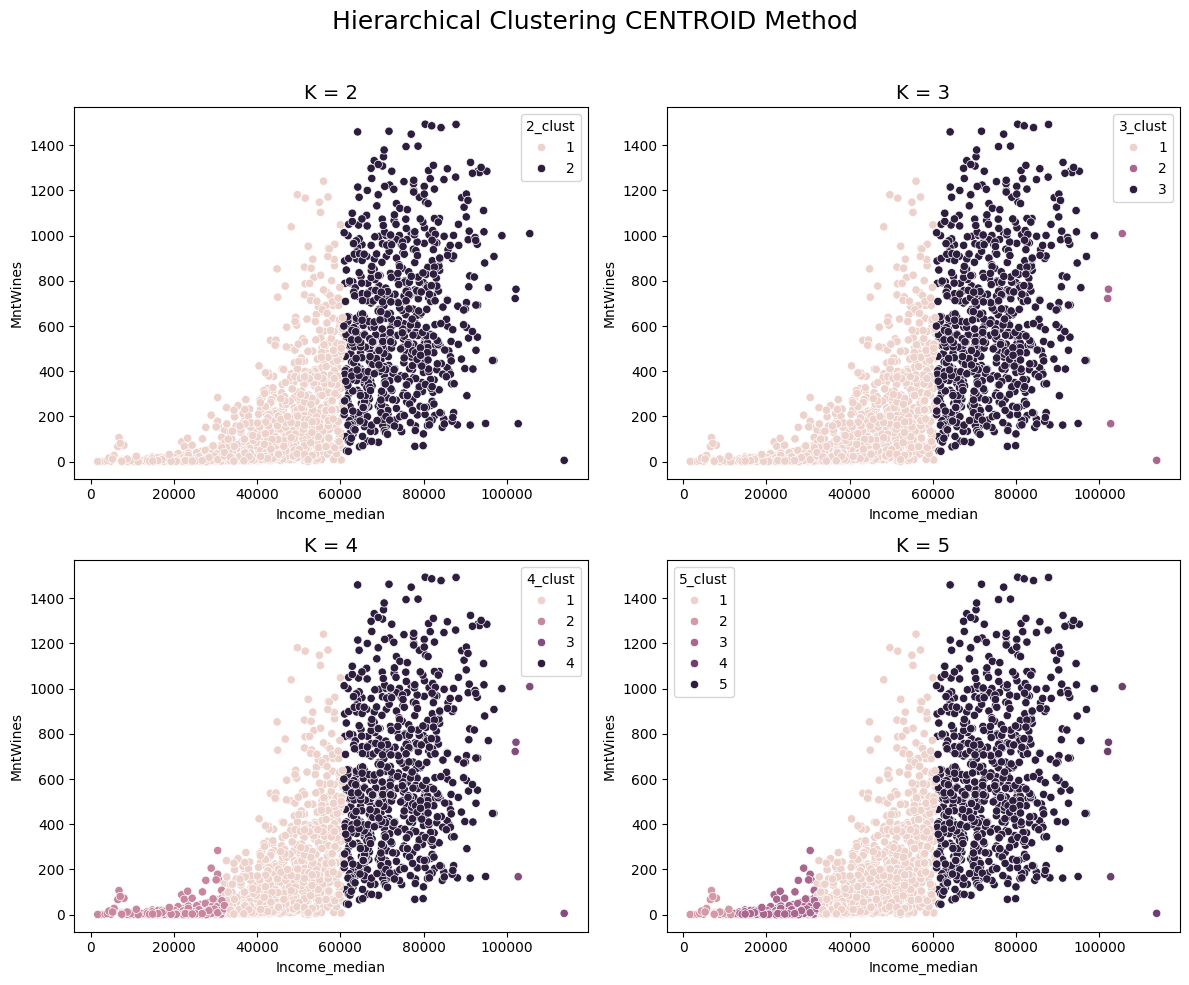

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 рядки, 2 колонки

fig.suptitle("Hierarchical Clustering CENTROID Method", fontsize=18)

# K = 2
sns.scatterplot(
    x="Income_median", y="MntWines", data=X_new, hue="2_clust", ax=axes[0, 0]
)
axes[0, 0].set_title("K = 2", fontsize=14)

# K = 3
sns.scatterplot(
    x="Income_median", y="MntWines", data=X_new, hue="3_clust", ax=axes[0, 1]
)
axes[0, 1].set_title("K = 3", fontsize=14)

# K = 4
sns.scatterplot(
    x="Income_median", y="MntWines", data=X_new, hue="4_clust", ax=axes[1, 0]
)
axes[1, 0].set_title("K = 4", fontsize=14)

# K = 5
sns.scatterplot(
    x="Income_median", y="MntWines", data=X_new, hue="5_clust", ax=axes[1, 1]
)
axes[1, 1].set_title("K = 5", fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # щоб не перекривалися з заголовком
plt.show()

In [ ]:
s = metrics.silhouette_score(X_new, X_new['2_clust'], metric='euclidean')
print(f'Silhouette score(k = 2): {s:.2f}')

s = metrics.silhouette_score(X_new, X_new['3_clust'], metric='euclidean')
print(f'Silhouette score(k = 3): {s:.2f}')

s = metrics.silhouette_score(X_new, X_new['4_clust'], metric='euclidean')
print(f'Silhouette score(k = 4): {s:.2f}')

s = metrics.silhouette_score(X_new, X_new['5_clust'], metric='euclidean')
print(f'Silhouette score(k = 5): {s:.2f}')

Silhouette score(k = 2): 0.57
Silhouette score(k = 3): 0.53
Silhouette score(k = 4): 0.50
Silhouette score(k = 5): 0.47


In [ ]:
X_new.drop(['2_clust',	'3_clust', '4_clust', '5_clust'], axis = 1, inplace = True)

**Спостереження:**

Найкраща метрика силуету для двох кластерів і відповідна візуалізація виглядає найзрозуміліше.

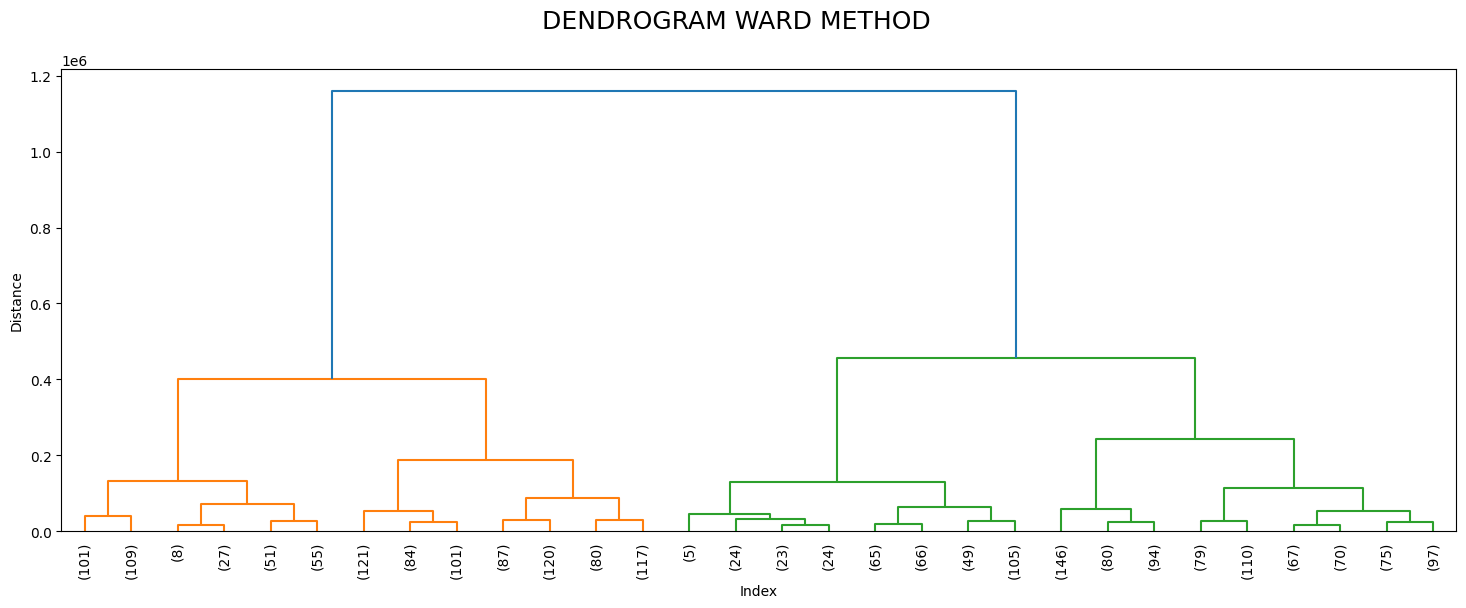

In [ ]:
dist_sin = linkage(X_new, method="ward")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90,truncate_mode="lastp")
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM WARD METHOD",fontsize=18)
plt.show()

In [ ]:
X_new.loc[:, '2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
X_new.loc[:, '4_clust'] = fcluster(dist_sin, 4, criterion='maxclust')

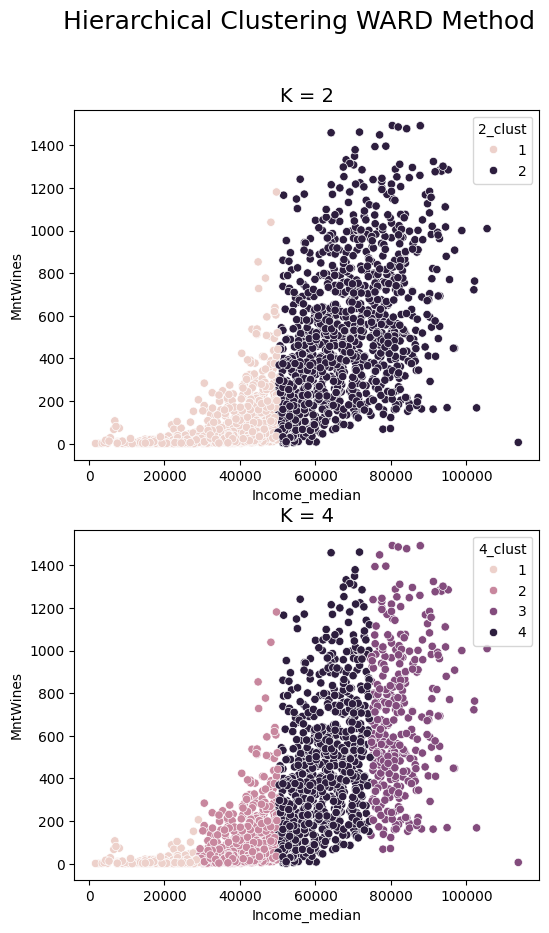

In [ ]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering WARD Method",fontsize=18)

plt.subplot(2,1, 1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income_median",y="MntWines", data=X_new, hue="2_clust")

plt.subplot(2, 1, 2)
plt.title("K = 4",fontsize=14)
sns.scatterplot(x="Income_median",y="MntWines", data=X_new, hue="4_clust");

In [ ]:
s = metrics.silhouette_score(X_new, X_new['2_clust'], metric='euclidean')
print(f'Silhouette score(k = 2): {s:.2f}')
s = metrics.silhouette_score(X_new, X_new['4_clust'], metric='euclidean')
print(f'Silhouette score(k = 4): {s:.2f}')

Silhouette score(k = 2): 0.60
Silhouette score(k = 4): 0.51


**Спостереження:**

Розбиття на два або чотири кластери показують непогані метрики і на візуалізаціях розподіл виглядає зрозумілим. Тому практична цінність може бути, а який саме розподіл обрати 2 або 4 залежить від цілей(більш загальний чи персоналізований).